___
# PROJETO 1

## <font color='red'>PEDRO CERVERA MARTINS GARCIA</font>
___

## <font color='blue'>APOSENTADOS E EDUCACAO</font>

## Introdução

Pretendo analisar a educacao dos aposentados para ver como a educacao de uma pessoa reflete em sua aposentadoria, vou
fazer isso analisando os aposentados que termiram o ensino fundamental 1 e 2(4a serie e 8a serie) para entao ver os possiveis
reflexos que isso pode causar na aposentadoria




Descreva aqui a motivação para escolha dos grupos e o que pretende analisar!

Exemplifique identificando uma pesquisa semelhante feita no Brasil ou no exterior que compare uma parcela da população (apossentados, imigrantes, mulheres, jovens) com todo resto. Critique esta pesquisa (que tipo de variáveis usou? Que recurso de estatística descritiva?). Pode ser um artigo de jornal.


___
## Análise e Resultados

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\pedro\Documents\facul\segundo semestre\Ciencia dos dados\CDEng\meu github\CD\Projeto1


In [4]:
"""Vamos ler a estrutura da PNAD como um dataframe.
    São muitas colunas e precisamos usar a informação de tamanho para ler a PNAD de fato
    como uma base de tamanho fixo"""
estrutura = pd.read_table("pes_py.txt", sep=";")

In [5]:
estrutura.head()

,Coluna,Tamanho,Título
0,V0101,4,Ano de referência
1,UF,2,Unidade da Federação
2,V0102,6,Número de controle
3,V0103,3,Número de série
4,V0301,2,Número de ordem


In [7]:
# Se quiser uma leitura mais rápida, use o arquivo descompactado. Não esqueça de adicionar ao seu .gitignore
#pnad2014 = pd.read_fwf("PES2014.txt", widths=estrutura.Tamanho, header=None)

# Se quiser economizar espaço, use o arquivo Zip
pnad2014 = pd.read_fwf("PES2014.zip", widths=estrutura.Tamanho, header=None, compression="zip")
print("funfou")

funfou


In [8]:
pnad2014.head()

,0,1,2,3,4,5,6,7,8,9,...,331,332,333,334,335,336,337,338,339,340
0,2014,11,15,1,1,2,19,8,1987,27,...,3.0,500.0,3.0,3,1.0,2.0,2.0,1.0,500.0,20160623
1,2014,11,15,1,2,4,19,1,1986,28,...,3.0,500.0,3.0,4,2.0,NaN,2.0,1.0,500.0,20160623
2,2014,11,15,1,3,2,14,5,2013,1,...,3.0,500.0,3.0,1,NaN,NaN,NaN,NaN,500.0,20160623
3,2014,11,15,2,1,2,8,4,1963,51,...,2.0,1150.0,4.0,2,1.0,2.0,2.0,1.0,1150.0,20160623
4,2014,11,15,2,2,4,6,11,1970,43,...,2.0,1150.0,4.0,3,1.0,2.0,2.0,1.0,1150.0,20160623


In [9]:
estrutura.columns

Index(['Coluna', 'Tamanho', 'Título'], dtype='object')

In [10]:
pnad2014.columns = estrutura.Coluna

In [19]:
pnad2014.head()

Coluna,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,V8005,...,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993
0,2014,11,15,1,1,2,19,8,1987,27,...,3.0,500.0,3.0,3,1.0,2.0,2.0,1.0,500.0,20160623
1,2014,11,15,1,2,4,19,1,1986,28,...,3.0,500.0,3.0,4,2.0,NaN,2.0,1.0,500.0,20160623
2,2014,11,15,1,3,2,14,5,2013,1,...,3.0,500.0,3.0,1,NaN,NaN,NaN,NaN,500.0,20160623
3,2014,11,15,2,1,2,8,4,1963,51,...,2.0,1150.0,4.0,2,1.0,2.0,2.0,1.0,1150.0,20160623
4,2014,11,15,2,2,4,6,11,1970,43,...,2.0,1150.0,4.0,3,1.0,2.0,2.0,1.0,1150.0,20160623


___

In [11]:
pnad2014.V9122 = pnad2014.V9122.astype('category')#aposentadoria
pnad2014.V9122.cat.categories = ('Aposentado', 'N Aposentado')
#V4750,V0404,UF,V4011,V0601,V6007,V8005
#pnad2014.V4750 = pnad2014.V4750.astype('float')
pnad2014.V0404 = pnad2014.V0404.astype('category')#RACA
pnad2014.V0404.cat.categories = ('Indigina', 'Branca',"Preta","Amarelo","Parda","Sem declaracao")
pnad2014.V4011 = pnad2014.V4011.astype('category')#estado civil
pnad2014.V4011.cat.categories = ('Solteiro', 'Casado','Separado','Divorciado','Viuvo')
pnad2014.V0601 = pnad2014.V0601.astype('category')#alfabetismo
pnad2014.V0601.cat.categories = ('Alfabetizado', 'Analfabeto')
pnad2014.V6007 = pnad2014.V6007.astype('category')#ensino
pnad2014.V6007.cat.categories = ('Elementar', 'Médio 1º','Médio 2º','ensino fundamenta','ensino médio','supletivo do ensino fundamental','supletivo de ensino médio','Superior de graduação','Mestrado ou doutorado','Alfabetização de jovens e adultos','Creche','Classe de alfabetização - CA ','Maternal, jardim de infância etc.')
pnad2014.V8005 = pnad2014.V8005.astype('float')#renda

#0606 "SE FREQUENTOU ESCOLA"
pnad2014.V0606 = pnad2014.V0606.astype('category')#ensino
pnad2014.V0606.cat.categories = ('Sim', 'Nao')
#0601 "Se sabe ler e escrever"
#6007 "curso mais alto que frequentou"
#0611  " se completou o curso "
#pnad2014.V0611 = pnad2014.V0611.astype('category')#ensino
#6002 " publica ou privada "
#pnad2014.V6002 = pnad2014.V6002.astype('category')#ensino
#V0609 "se concluiu pelo meos a 1a serie"
pnad2014.V0609 = pnad2014.V0609.astype('category')#ensino
pnad2014.V0609.cat.categories = ('Sim', 'Nao')
#0610 "ultima serie concluida com sucesso"
pnad2014.V0610 = pnad2014.V0610.astype('category')#ensino
pnad2014.V0610.cat.categories = ('9a','1a','2a','3a','4a','5a','6a','7a','8a')
#V1011 se teve algum filho nascido vivo até a data de referência
pnad2014.V1101 = pnad2014.V1101.astype('category')#filhos
pnad2014.V1101.cat.categories = ('sim','nao')
pnad2014.V9001 = pnad2014.V9001.astype('category')#trabalho
pnad2014.V9001.cat.categories = ('sim','nao')

In [12]:
pnad2014.REGIAO = pnad2014.UF
pnad2014.UF = pnad2014.UF.astype('category')
pnad2014.UF.cat.categories = ('RO','AC','AM','RR','PA','AP','TO','MA','PI','CE','RN','PB','PE','AL','SE','BA','MG','ES','RJ','SP','PR','SC','RS','MS','MT','GO','DF')
pnad2014.REGIAO[(pnad2014.UF == 'GO') | (pnad2014.UF == 'MT') | (pnad2014.UF == 'MS') | (pnad2014.UF == 'DF')]  = "Centro Oeste"
pnad2014.REGIAO[(pnad2014.UF == 'AC') | (pnad2014.UF == 'AM') | (pnad2014.UF == 'AP') | (pnad2014.UF == 'PA') | (pnad2014.UF == 'RR') | (pnad2014.UF == 'RO') | (pnad2014.UF == 'TO')]  = "Norte"
pnad2014.REGIAO[(pnad2014.UF == 'RS') | (pnad2014.UF == 'PR') | (pnad2014.UF == 'SC')]  = "Sul"
pnad2014.REGIAO[(pnad2014.UF == 'ES') | (pnad2014.UF == 'MG') | (pnad2014.UF == 'RJ') | (pnad2014.UF == 'SP')]  = "Sudeste"
pnad2014.REGIAO[(pnad2014.UF == 'AL') | (pnad2014.UF == 'BA') | (pnad2014.UF == 'CE') | (pnad2014.UF == 'MA') | (pnad2014.UF == 'PI') | (pnad2014.UF == 'PE') | (pnad2014.UF == 'PB') | (pnad2014.UF == 'RN') | (pnad2014.UF == 'SE')]  = "Nordeste"


#dados.loc[(dados.UF>29)&(dados<41),"REGIAO"]= "Sudeste"

C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [34]:
p = pnad2014.V4750[pnad2014.V4750 < 999999999999]
n = pnad2014.shape[0]

In [151]:
ut1 = ((pnad2014.V9122.value_counts()/n*100).round(decimals=5))
print(ut1,'\n')

N Aposentado    75.31651
Aposentado      10.65640
Name: V9122, dtype: float64 



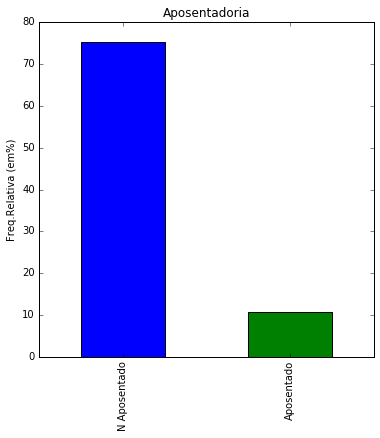

In [152]:
plot = ut1.plot(kind='bar',title='Aposentadoria',figsize=(6, 6),color=('b','g'))
pnad2014.V9122.cat.categories = ('Aposentado', 'N Aposentado')
plt.ylabel('Freq.Relativa (em%)')
plt.xlabel('')

In [15]:
pnad2014.V4750 = pnad2014.V4750.astype('float')
renda = pnad2014.V4750
renda = renda[renda != 999999999999]
intervalo_renda = range(0,10000,100)
f_renda = pd.cut(renda,intervalo_renda)
#f_renda.value_counts()

In [16]:
ct0 =pd.crosstab(pnad2014.V9122,pnad2014.V0610,rownames=['Aposentadoria'], colnames=['Cor'])
ct0f = ct0.fillna(0)
ct0f

Cor,9a,1a,2a,3a,4a,5a,6a,7a,8a
Aposentadoria,,,,,,,,,
Aposentado,13,1949,3081,7312,10322,2900,764,250,957
N Aposentado,776,10863,13783,70716,35397,17883,8414,7755,16905


In [13]:
ap_pnad3= pnad2014[(pnad2014.V9122 == 'Aposentado')   & (pnad2014.V0610 == '8a') & (pnad2014.V4750 < 999999999999)]

ap_pnad4= pnad2014[(pnad2014.V9122 == 'Aposentado')   & (pnad2014.V0610 == '4a') & (pnad2014.V4750 < 999999999999)]

ap_pnad5 = pnad2014[(pnad2014.V9122 == 'Aposentado')   & (pnad2014.V0610 == '4a' ) | (pnad2014.V0610 == "8a") & (pnad2014.V4750 < 999999999999)]

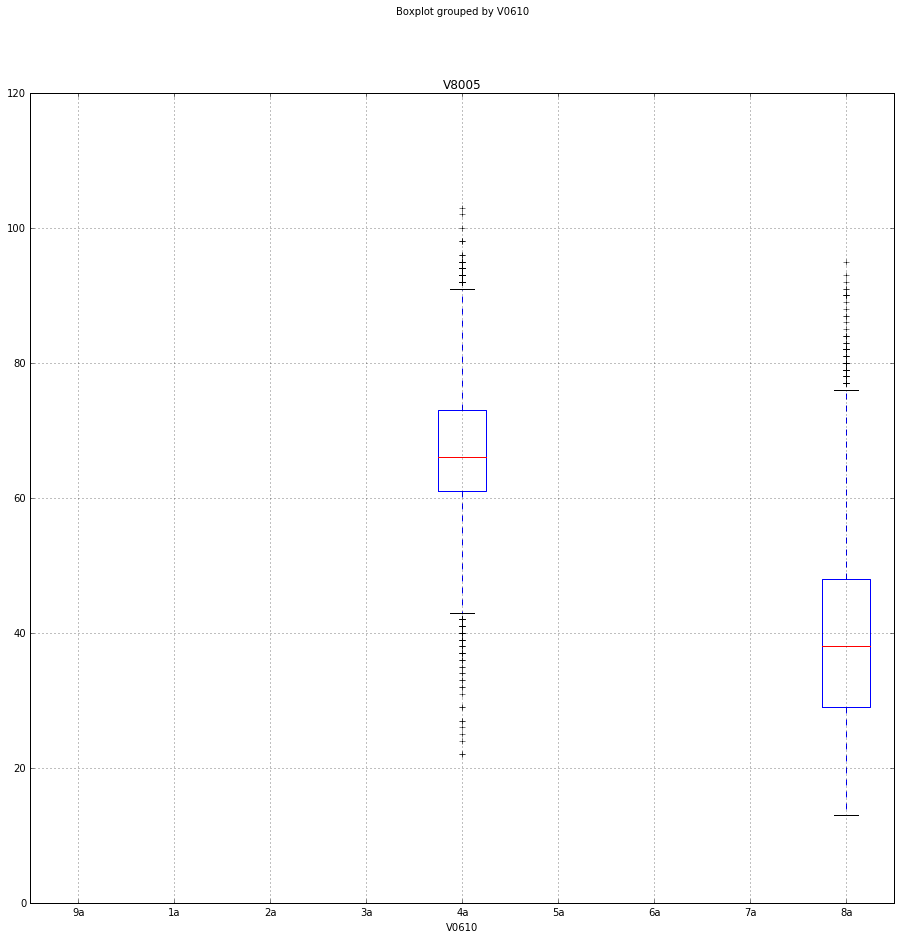

In [114]:
ap_pnad5.boxplot(column = "V8005", by = "V0610", figsize = (15,15) )

## Aposentados que estudam mais vivem menos

### Raca de aposentados e sua educacao

In [98]:
ct10 = pd.crosstab(ap_pnad5.V0610,ap_pnad5.V0404,rownames=['Serie'], colnames=['Cor'])
ct11 = pd.crosstab(ap_pnad4.V0610,ap_pnad4.V0404,rownames=['Serie'], colnames=['Cor'])


In [118]:
ct10

Cor,Indigina,Branca,Preta,Amarelo,Parda,Sem declaracao
Serie,,,,,,
9a,0,0,0,0,0,0
1a,0,0,0,0,0,0
2a,0,0,0,0,0,0
3a,0,0,0,0,0,0
4a,30,6303,723,90,3176,0
5a,0,0,0,0,0,0
6a,0,0,0,0,0,0
7a,0,0,0,0,0,0
8a,77,6992,1761,37,8382,0


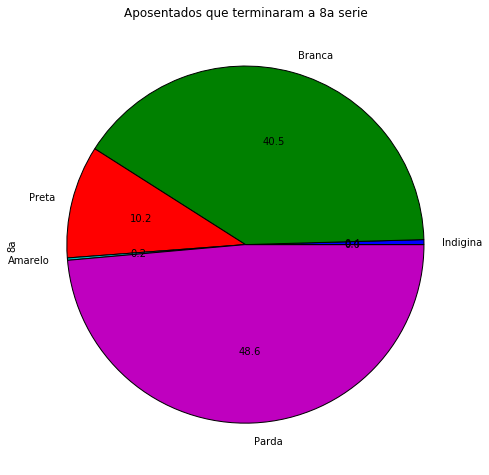

In [100]:
ct10.iloc[8].plot.pie(title='Aposentados que terminaram a 8a serie',autopct='%.1f',figsize=(8, 8)) #raca dos aposentados que terminou ate a 8a serie

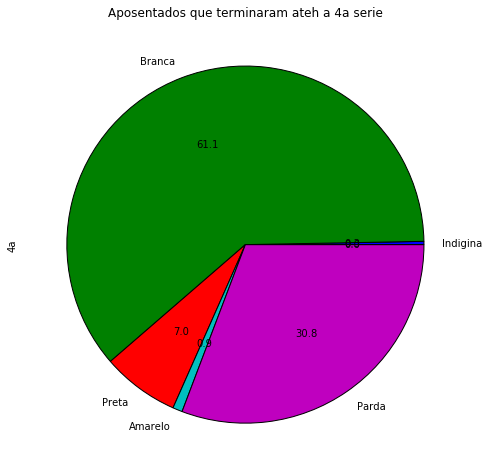

In [101]:
ct10.iloc[4].plot.pie(title='Aposentados que terminaram ateh a 4a serie',autopct='%.1f',figsize=(8, 8))#raca dos aposentados que terminou ate a 4a serie

## Aposentados Brancos tendem a sair antes da escola

In [23]:
ct20 = pd.crosstab(ap_pnad5.V0610,ap_pnad5.V1101,rownames=['Serie'], colnames=['se tem filho'])



In [16]:
a = ct20*100/ct20.sum()

In [25]:
ct20

se tem filho,sim,nao
Serie,,
9a,0,0
1a,0,0
2a,0,0
3a,0,0
4a,4536,843
5a,0,0
6a,0,0
7a,0,0
8a,7195,1206


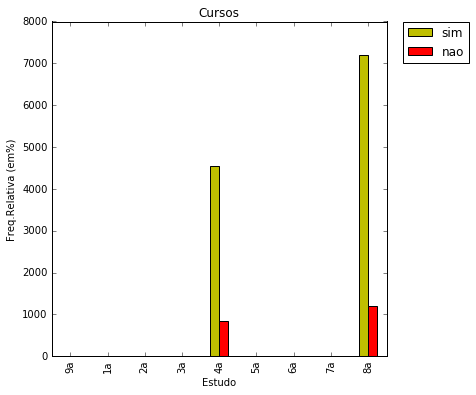

In [22]:
ct20.plot(kind='bar',title='Cursos',figsize=(6, 6),color=('y','r'))
plt.ylabel('Freq.Relativa (em%)')
plt.xlabel('Estudo')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000CD03B17C50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000CD03B5E6A0>], dtype=object)

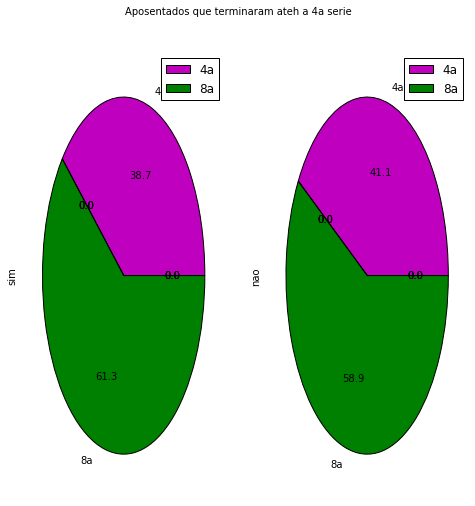

In [21]:
ct20.plot.pie(title='Aposentados que terminaram ateh a 4a serie',autopct='%.1f',figsize=(8, 8),subplots=True)

## Quem terminou a 8a serie tem mais filhos

In [111]:
ct30 = pd.crosstab(ap_pnad5.V0610,ap_pnad5.V4750,rownames=['Serie'], colnames=['Renda'])
ct31 = pd.crosstab(ap_pnad5.V4750,ap_pnad5.V0610,rownames=['Serie'], colnames=['Cor'])

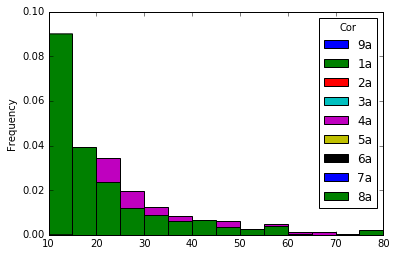

In [116]:
intervalo_renda = np.arange(0,60000,5)
plot = ct31.plot.hist(bins=intervalo_idades,normed = 1)

## Aposentados que terminaram a 8a serie tendem a ganhar mais

In [27]:
ct40 = pd.crosstab(ap_pnad5.V0610,ap_pnad5.V9001,rownames=['Serie'], colnames=['se trabalha'])

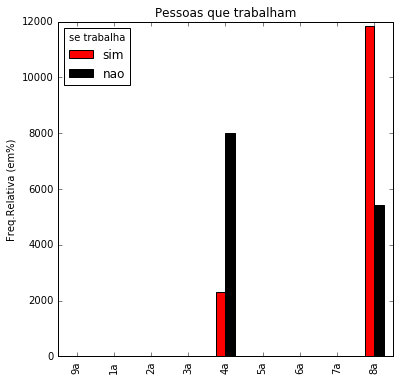

In [28]:
ct40.plot(kind='bar',title='Pessoas que trabalham',figsize=(6, 6),color=('r','black'))
plt.ylabel('Freq.Relativa (em%)')
plt.xlabel('')

## Aposentados que terminaram a 8a serie trabalham mais na aposentadoria

In [29]:
ct50 = pd.crosstab(ap_pnad5.V4011,ap_pnad5.V4750,rownames=['Serie'], colnames=['Cor'])

___
# Conclusão 

Descreva aqui suas conclusões!

## Aposentados que estudam mais vivem menos

 Vendo como a idade media dequeles que terminaram a 8a serie eh menor comparado com aqueles que soh terminaram a 4a serie podemos concluir que os aposentados que estudaram mais morreram mais cedo

## Aposentados Brancos tendem a sair antes da escola

Comparando o percentual de Aposentados brancos que terminaram a 4a serie e os que terminaram 

## Quem terminou a 8a serie tem mais filhos

O percentual de quem tem filhos por quem n tem filhos eh maior para quem terminou a 8a serie

## Aposentados que terminaram a 8a serie tendem a ganhar mais

Vendo o grafico, ve-se que ha mais aposentados na parte a direita, que eh onde se ganha mais

## Aposentados que terminaram a 8a serie trabalham mais na aposentadoria

Como o grafico mostra, a quantidade de aposentados que ainda trabalham eh bem maior para aqueles que terminaram a 8a serie